# Задание 1.1

$$X_1, X_2, ... X_n \sim U[-\theta, \theta]$$

Воспользуемся методом моментов для оценки $\theta$.

У нас одна неизвестная, возьмём $g(x) = x^2$ - второй момент, т.к. первый равен 0 и не зависит от $\theta$

$$E X^2 = \frac{\theta^2}{3}$$

$$\overline{X^2} = \frac{\hat{\theta}^2}{3}$$

$$\theta = \sqrt{3 \overline{X^2}}$$

In [44]:
from scipy import stats
import matplotlib.pyplot as plt
import math

In [45]:
SAMPLE_SIZES = [1, 10, 100, 1000, 10000, 100000]
M = 10

In [46]:
theta = 10
rnd = stats.uniform(-theta, theta * 2)

In [47]:
sample = [[[rnd.rvs() for _ in range(sz)] for _ in range(M)] for sz in SAMPLE_SIZES]


[[np.float64(9.266637084459589), np.float64(3.6269678641055627), np.float64(-0.2937035221435753), np.float64(7.7082780407763245), np.float64(3.634115740230568), np.float64(-4.793246647758966), np.float64(5.9413644393092255), np.float64(-1.4960268703902386), np.float64(9.785378533703227), np.float64(0.007700609327489616)], [np.float64(-2.7554762725661934), np.float64(-4.717460327868408), np.float64(-9.273922544015356), np.float64(-1.5530114285068901), np.float64(4.898959364194724), np.float64(2.1102663011216105), np.float64(-3.9362769261719883), np.float64(-5.6984655753883295), np.float64(-8.32553611204249), np.float64(-1.0330893250541973)], [np.float64(5.68541859688464), np.float64(-0.6249461281250497), np.float64(3.496013943464831), np.float64(-3.9271362027464507), np.float64(2.4627829075235255), np.float64(8.801446768711212), np.float64(1.0212281678242459), np.float64(8.11422938286045), np.float64(-2.7231149056175497), np.float64(-7.771527202144166)], [np.float64(3.9967043843125047),

In [48]:
def estimate_theta(sample):
    return math.sqrt(3 * sum(map(lambda x: x ** 2, sample)) / len(sample))

In [78]:
estimated = [[estimate_theta(sample[i][j]) - theta for j in range(M)] for i in range(len(SAMPLE_SIZES))]

In [79]:
print("N\t\t\ttheta_hat")
for i in range(len(SAMPLE_SIZES)):
    print(f"{SAMPLE_SIZES[i]}\t\t\t{estimate_theta(sample[i][0])}")

N			theta_hat
1			9.570963434003186
10			9.919720988611669
100			10.043255226827304
1000			9.55794808037999
10000			9.956792052730382
100000			9.990087973817438


Случайная величина - $(\hat{\theta} - \theta)$ рассчитанная для фиксированного `N`. Соотвественно объем выборки `M`.

Посчитаем выборочные характеристики: среднее, дисперсия, медиана, минимум, максимум, количество оценок, которые отличаются от теортического параметра не более чем на заданный порог

Порогом для совпадение поставим отличие не более чем на 0.005


In [95]:
def sample_mean(sample):
    return sum(sample) / len(sample)

def sample_variance(sample):
    m = sample_mean(sample)
    return sum(map(lambda x: (x - m) ** 2, sample)) / len(sample)

def sample_median(sample):
    s = sample.copy()
    s.sort()
    return s[int(len(s) / 2)]

lim = 0.005

def sample_cnt_good(sample):
    return len(tuple(filter(lambda x: abs(x) < lim , sample)))

In [96]:
def process_stats(sample, N):
    print(f"=================== N={N} ===================")
    plt.plot(sample)
    mn = min(min(sample) - 1, -1)
    mx = max(max(sample) + 1, 1)
    plt.ylim(mn, mx)
    plt.show()

    def print_stat(name, stat):
        print(f"{name}\t\t{stat(sample)}")

    print_stat("Mean", sample_mean)
    print_stat("Variance", sample_variance)
    print_stat("Median", sample_median)
    print_stat("Max", max)
    print_stat("Min", min)
    print_stat("Good", sample_cnt_good)



=================== N=1 ===================


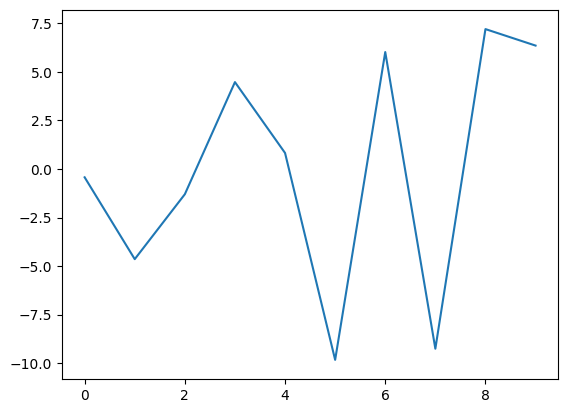

Mean		-0.058452735274762094
Variance		35.507141969064094
Median		0.824185575229146
Max		7.205117683600605
Min		-9.832602574886772
Good		0
=================== N=10 ===================


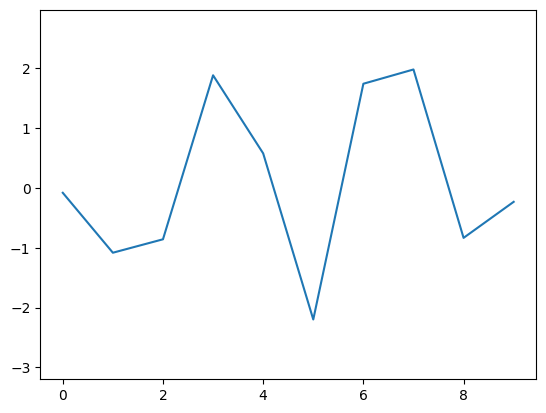

Mean		0.09022390264921745
Variance		1.8269377262645243
Median		-0.08027901138833116
Max		1.981664296807411
Min		-2.198889679378625
Good		0
=================== N=100 ===================


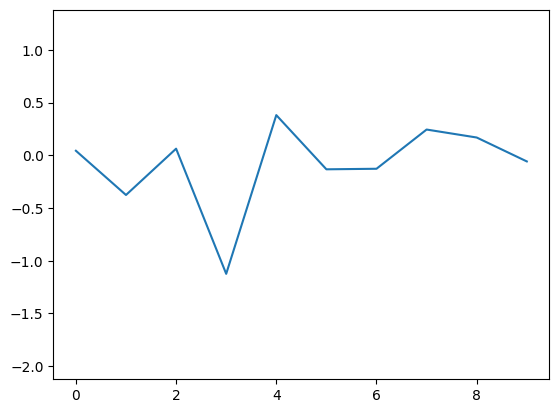

Mean		-0.09176169469488613
Variance		0.15976348328292997
Median		0.04325522682730387
Max		0.3813016272119292
Min		-1.1240921595418243
Good		0
=================== N=1000 ===================


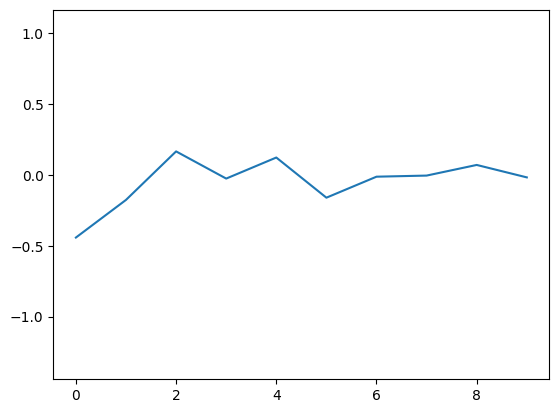

Mean		-0.0480717552446059
Variance		0.027789156228952165
Median		-0.012554833243214603
Max		0.16592236703354857
Min		-0.44205191962000967
Good		1
=================== N=10000 ===================


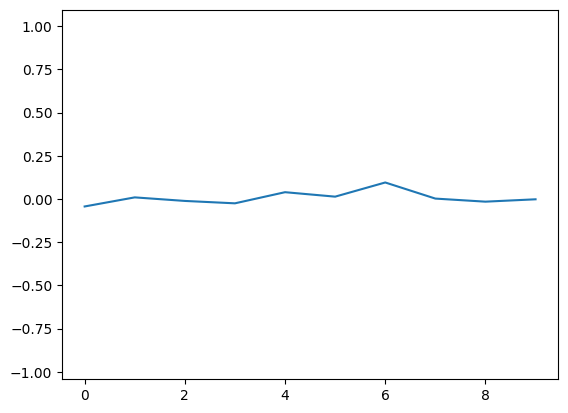

Mean		0.00640635472162252
Variance		0.0013420852543330852
Median		0.0024227517201165227
Max		0.09560687474583318
Min		-0.043207947269618074
Good		2
=================== N=100000 ===================


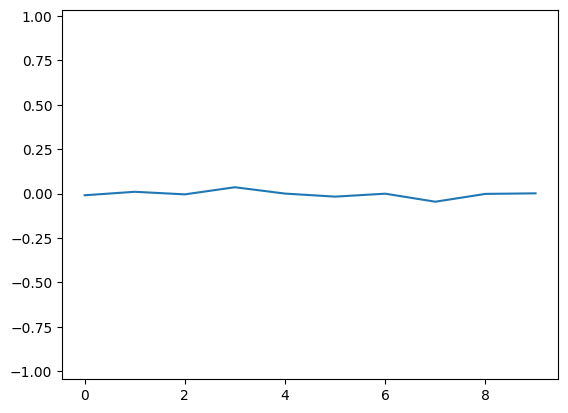

Mean		-0.003618606802026392
Variance		0.00037777700036273126
Median		-0.001015001277774985
Max		0.035290269548953646
Min		-0.04617605401855407
Good		5


In [97]:
for i in range(len(SAMPLE_SIZES)):
    process_stats(estimated[i], SAMPLE_SIZES[i])